In [1]:
import config
import numpy as np
import pandas as pd

CRYPTO_STUDY_FILE = os.path.join(config.DATA_DIR, 'dtb/CRYPTO_STUDIED.json')
STORE = os.path.join(config.DATA_DIR, 'dtb/store.h5')
store = pd.HDFStore(STORE)
df = store['min']
df.head(10)

,BTC-EUR,ETH-EUR,ETC-EUR,LTC-EUR,USDC-EUR
1624651380,26783.47,1544.37,33.4915,107.070,0.838
1624651440,26880.68,1550.35,33.5240,107.175,0.839
1624651500,26833.93,1547.07,33.5390,107.280,0.838
1624651560,26897.84,1551.49,33.7440,107.370,0.838
1624651620,26931.03,1552.34,33.7440,107.740,0.838
1624651680,26975.82,1554.58,33.8450,107.800,0.839
1624651740,26992.22,1555.09,33.7950,107.860,0.838
1624651800,26932.27,1550.70,33.7950,107.330,0.838
1624651860,26899.14,1548.44,33.7950,107.290,0.838
1624651920,26875.98,1547.52,33.7450,107.190,0.839


Text(0.5, 0, 'Time (min)')

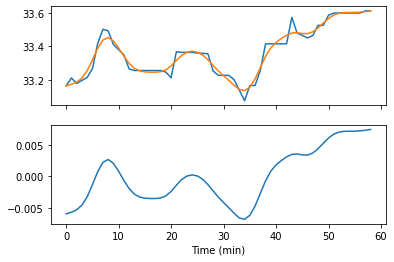

In [15]:
from matplotlib import pyplot as plt
from scipy import signal

signal_in = df['ETC-EUR'].iloc[-60:-1].to_numpy()
t=np.linspace(0, len(signal_in)-1, len(signal_in))

### Filtering
Fs = 1/60 #Corresponding to 1min
Fc = Fs/8
Order = 2
b,a = signal.butter(Order, Fc, 'low', fs=Fs, output='ba')
signal_denoised = signal.filtfilt(b,a, signal_in)

### Percentage
percentage = signal_denoised/np.average(signal_denoised) -1 

# ### Normalization using percentage
# NB_DELAY = 1 # In min
# b = [0]*(NB_DELAY+1)
# b[0] = 1
# b[-1] = -1
# a = [1]
# signal_with_delay = np.concatenate((signal_denoised[0]*np.ones((NB_DELAY,)), signal_denoised), axis=0)
# diff_test = signal.lfilter(b,a, signal_with_delay)
# diff_test = diff_test[NB_DELAY:]/signal_with_delay[:-NB_DELAY]

# ### Sliding Sum
# NB_DELAY = 8 # In min
# b = [0]*(NB_DELAY+1)
# b[0] = 1
# b[-1] = -1
# a = [1, -1]
# diff_with_delay = np.concatenate((diff_test[0]*np.ones((NB_DELAY,)), diff_test), axis=0)
# sum_test = signal.lfilter(b,a, diff_with_delay)
# sum_test = sum_test[NB_DELAY:]

fig, sp = plt.subplots(2,1,sharex=True)
sp[0].plot(t, signal_in, label='raw')
sp[0].plot(t, signal_denoised, label='hfilter')

sp[1].plot(t, percentage, label='percentage')

# sp[2].plot(t, sum_test, label='sum')

sp[-1].set_xlabel('Time (min)')

0.3618482423419096

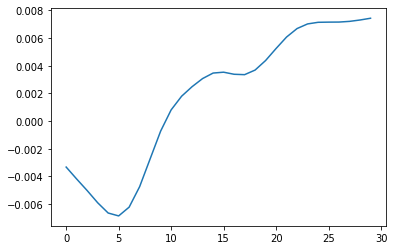

In [20]:
in_factor = percentage[-30:]
pole = np.exp(-1/20)

ratio = np.ones(np.shape(in_factor))
for i in (range(len(in_factor)-1)[::-1]):
    ratio[i] = pole*ratio[i+1]

plt.plot(in_factor) 
quality_factor = sum(ratio*in_factor)/sum(ratio)*100
quality_factor

In [ ]:
-